In [4]:
import matplotlib.pyplot as plt 
from numpy import array, zeros 
from statistics import mean
from sklearn.metrics import r2_score
import pandas as pd
import folium



In [5]:
df = pd.read_csv("unnati_phase1_data.csv")
df

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58
...,...,...,...,...,...,...,...
22398,cas_hmw,2022-06-31,20:29:05,13.066866,80.254351,5339,8
22399,cas_hmw,2022-06-31,20:30:33,13.067575,80.249719,5339,27
22400,cas_hmw,2022-06-31,20:30:35,13.067575,80.249719,5339,27
22401,cas_hmw,2022-06-31,20:30:36,13.067575,80.249719,5339,27


In [6]:
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22403 entries, 0 to 22402
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alert    22403 non-null  object 
 1   Date     22403 non-null  object 
 2   Time     22403 non-null  object 
 3   Lat      22402 non-null  float64
 4   Long     22402 non-null  float64
 5   Vehicle  22403 non-null  object 
 6   Speed    22403 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.2+ MB


In [7]:
columns_to_check = ['Lat', 'Long']
df_cleaned = df.dropna(subset=columns_to_check)

In [8]:
percentage = 1.00
df_sampled = df_cleaned.sample(frac=percentage, random_state=42)

print(df_sampled)

         Alert        Date      Time        Lat       Long Vehicle Speed
15679  cas_ldw  2022-06-13  07:54:39  12.706969  79.976003    2846    57
2403   cas_ldw  2022-06-06  18:12:09  12.585042  79.919280     805    58
14856  cas_pcw  2022-06-09  18:01:36  12.948541  80.208616    2846    32
17708  cas_ldw  2022-06-20  06:32:41  12.584652  79.919433    2846    56
12515  cas_ldw  2022-06-03  08:10:09  12.836146  80.051377     805    51
...        ...         ...       ...        ...        ...     ...   ...
11965  cas_hmw  2022-06-02  09:23:37  12.879598  80.080102    5339    26
21576  cas_hmw  2022-06-30  08:21:11  12.926927  80.118128     805    34
5390   cas_hmw  2022-06-16  07:50:02  12.996143  80.189454    5339    15
860    cas_hmw  2022-06-02  17:10:48  12.692939  79.979533     805    26
15796  cas_hmw  2022-06-14  16:47:51  12.932014  80.123102     805    33

[22402 rows x 7 columns]


In [9]:
m = folium.Map(location=[df_sampled['Lat'].mean(), df_sampled['Long'].mean()], zoom_start=12)

# Plot data points on the map
for index, row in df_sampled.iterrows():
    folium.Marker([row['Lat'], row['Long']], popup=row['Vehicle']).add_to(m)

# Save the map as an HTML file or use m.show() to display it in a Jupyter Notebook
m.save('map.html')

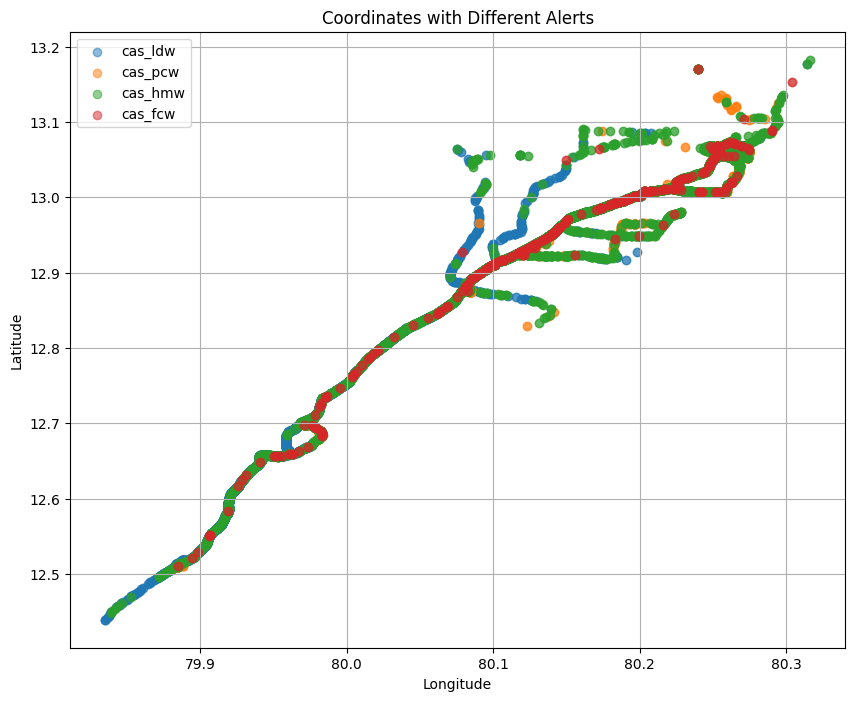

In [10]:
# df_sampled = pd.read_csv("unnati_phase1_data.csv")


# Filter columns containing coordinates and alert types
# Assuming you have 'Latitude', 'Longitude', and 'Alert' columns
coordinates = df_sampled[['Lat', 'Long']]
alerts = df_sampled['Alert']

# Create separate DataFrames for different alerts
alert_types = alerts.unique()
alert_data = {alert: coordinates[alerts == alert] for alert in alert_types}

# Create a scatter plot for each alert type
plt.figure(figsize=(10, 8))
for alert, data in alert_data.items():
    plt.scatter(data['Long'], data['Lat'], label=alert, alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates with Different Alerts')
plt.legend()
plt.grid()
plt.show()


In [13]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile

ModuleNotFoundError: No module named 'ipywidgets'